In [1]:
from fastai.vision import *
from H5pyList import H5pyList

The example files are stored in the folder called h5py which contains 10 files named test0 through test9 and each file contains 10 h5py datasets named dset0 through dset 9

In [10]:
file_il = H5pyList.from_file('./h5py/test0.h5py')
file_il

H5pyList (10 items)
Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3)
Path: h5py

In [12]:
folder_il = H5pyList.from_folder('h5py')
folder_il

H5pyList (100 items)
Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3)
Path: h5py

In [15]:
simple_df = pd.DataFrame({'Fn':['test' + str(i) for i in range(10)]})
simple_df

,Fn
0,test0
1,test1
2,test2
3,test3
4,test4
5,test5
6,test6
7,test7
8,test8
9,test9


In [19]:
simple_df_il = H5pyList.from_df(simple_df, path='.', cols=0, folder='h5py', suffix='.h5py')
simple_df_il

H5pyList (100 items)
Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3)
Path: .

In [24]:
fns = []
dsns = []
for i in range(10):
    for j in range(10):
        fns.append('test' + str(i) + '.h5py')
        dsns.append('dset' + str(j))
labels = [4]*50 + [5]*50
detailed_df = pd.DataFrame({'Fn':fns, 'Ds':dsns, 'Label':labels})
detailed_df.head()

,Fn,Ds,Label
0,test0.h5py,dset0,4
1,test0.h5py,dset1,4
2,test0.h5py,dset2,4
3,test0.h5py,dset3,4
4,test0.h5py,dset4,4


In [26]:
detailed_df_il = H5pyList.from_df(detailed_df, path='./h5py', cols=0, dsn_col=1)
detailed_df_il

H5pyList (100 items)
Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3)
Path: h5py

Example of a databunch

In [30]:
data = (detailed_df_il.split_by_rand_pct(.2, seed=42)
          .label_from_df(cols=2)).databunch(bs=5)
data

ImageDataBunch;

Train: LabelList (80 items)
x: H5pyList
Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3)
y: CategoryList
4,4,4,4,4
Path: h5py;

Valid: LabelList (20 items)
x: H5pyList
Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3),Image (3, 3, 3)
y: CategoryList
5,5,5,4,4
Path: h5py;

Test: None

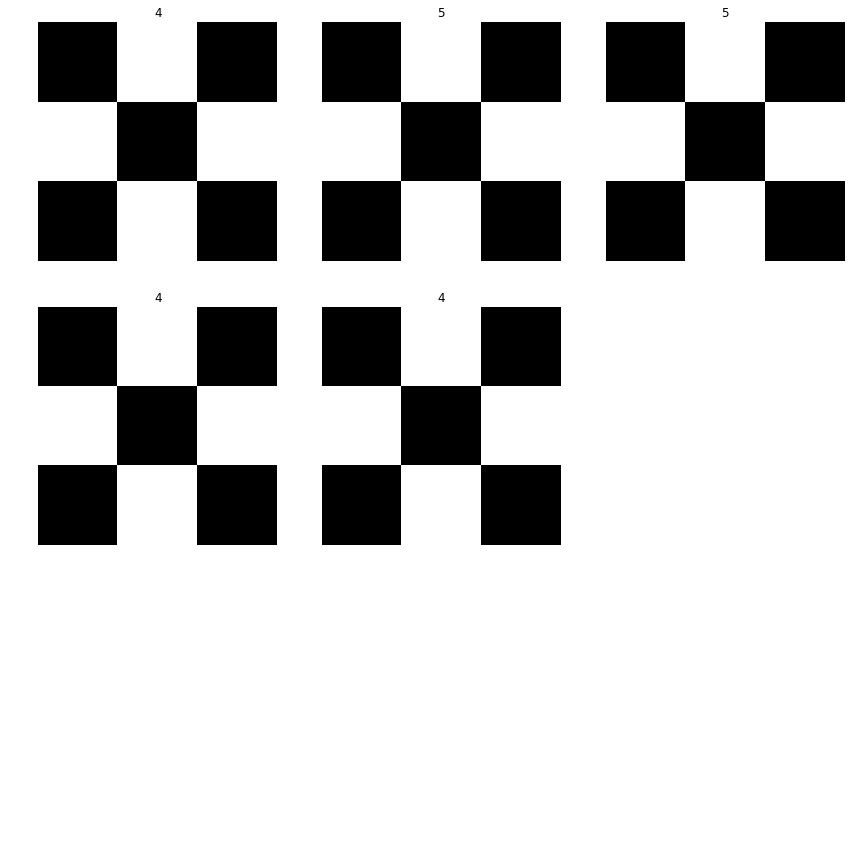

In [29]:
data.show_batch()